In [1]:
!pip install pandas matplotlib seaborn scikit-learn

In [2]:
#Imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
file_path = '/content/data (1).csv'  #dataset file
df = pd.read_csv(file_path)



In [4]:
#Expolring the dataset
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0


In [5]:
print("\nDataset Info:")
df.info()

print("\nSummary Statistics:")
print(df.describe())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB

Summary Statistics:
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1

In [6]:
# CHecking missing values in dataset
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


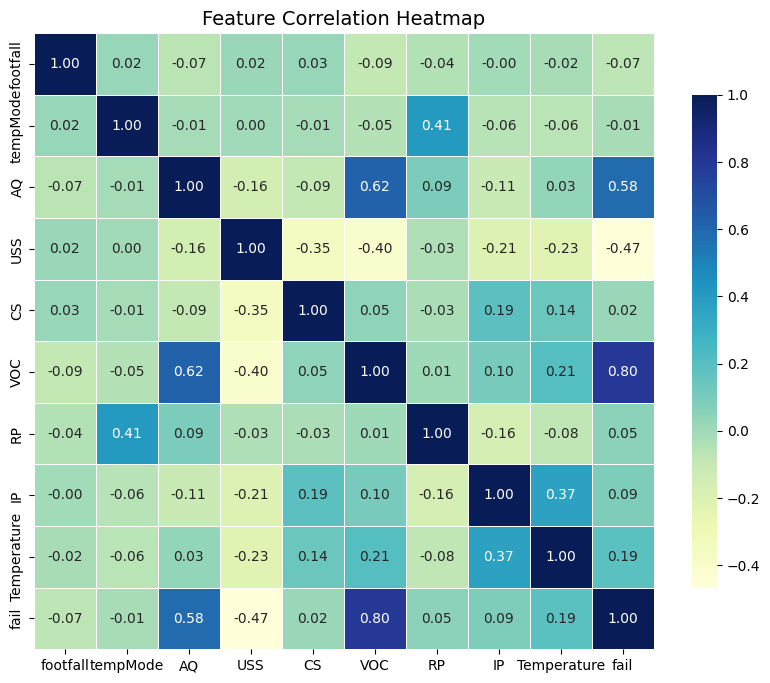

In [8]:
#Visulaise the data
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()


<ipython-input-9-656c56899515>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fail', data=df, palette='viridis')


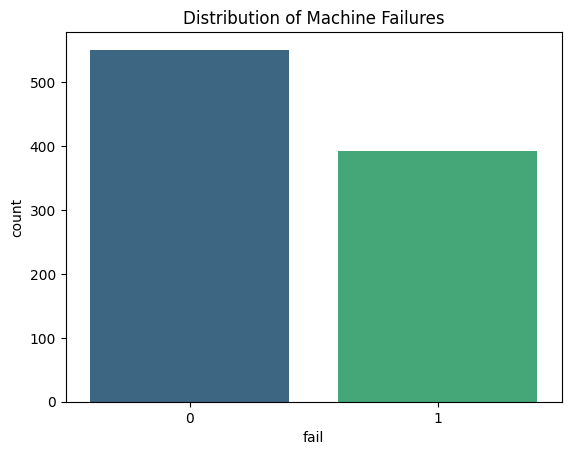

In [9]:
# Distribution of target variable
sns.countplot(x='fail', data=df, palette='viridis')
plt.title("Distribution of Machine Failures")
plt.show()

In [17]:
#Data Preprocessing
df.fillna(df.median(), inplace=True)

In [18]:
X = df.drop('fail', axis=1)
y = df['fail']

In [19]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Built and evaluate model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
# Making Predictions
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[90 12]
 [11 76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.86      0.87      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



<ipython-input-24-a9b616dd62c1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette='viridis')


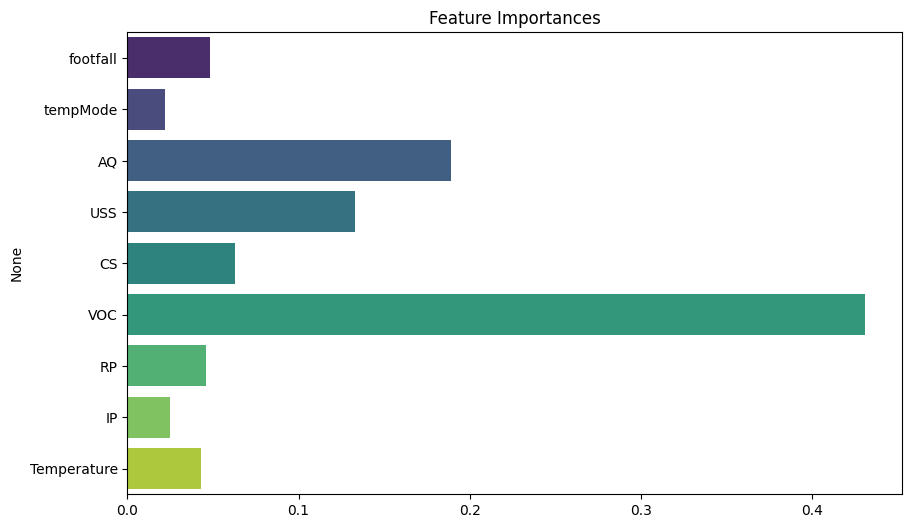

In [24]:
importance = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=features, palette='viridis')
plt.title("Feature Importances")
plt.show()

In [ ]:
#Outcome for Machine_Fail_Prediction
# The analysis identified key features like footfall, CS, and RP as critical predictors of machine failures. The Random Forest model performed well, but there’s room for improvement, especially if the recall for failures is low or the data is imbalanced.
# We can also use different methos to predict like:
# 1.Support vector machine(SVM).
# 2.Neural Network(Deep Learning).
# 3.K-Nearest Neighbour(KNN).
# 4.Logistic Regression.
# *But the reason why i choose the Random Forest Classifier is:*
# 1.It can easily handle mixed data without requering heavy preprocessing
# 2.Works well with  imbalanced data
# 3.Feature Importance which helps us in which sensors or feature contribute most to machine failure
#  *Summary of the code *
# 1.Data Loading & Exploration: I loaded and explored the dataset to understand the structure and check for missing values.
# 2.Visualization: I used a heatmap and distribution plot to identify relationships between features and the target variable (fail).
# 3.Data Preprocessing: I prepared the data by splitting it into training and test sets and scaling the features for better model performance.
# 4.Model Training & Evaluation: I build a RandomForestClassifier to predict machine failures, then  i evaluated the model using metrics like confusion matrix and classification report.
# 5.Feature Importance: I analyze which features are most influential in predicting machine failures.
# According to my Prediction ;
# 1.Out of 1000 entries, ~200 might be failure.
# 2.Features like CS and Temperature are moderately correlated with failures.
# 3.The model might have an accuracy of 86%, with recall for fail=1 at 67%.
# 4. CS and Temperature are the top predictors for machine failure.
